<a href="https://colab.research.google.com/github/yoouza/bigcontest/blob/master/visualizing/%EB%AC%BC%EB%A5%98%EB%A5%BC%ED%99%95%EC%9D%B8%ED%95%B4%EB%B3%B4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd 

df = pd.read_excel('/content/CJ Olive/2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx', encoding='utf-8')
df

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21
...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25


In [56]:
gb_df = df.groupby(['DL_YMD', 'DL_GD_LCLS_NM'])['INVC_CONT'].sum()
gb_df = pd.DataFrame(gb_df)
gb_df = gb_df.reset_index()
gb_df

,DL_YMD,DL_GD_LCLS_NM,INVC_CONT
0,190201,가구/인테리어,262
1,190201,도서/음반,2434
2,190201,디지털/가전,935
3,190201,생활건강,1483
4,190201,스포츠/레저,53
...,...,...,...
2399,200531,식품,2068
2400,200531,출산/육아,10
2401,200531,패션의류,1597
2402,200531,패션잡화,740


In [57]:
column_nm = list(df['DL_GD_LCLS_NM'].unique())
column_e = ['library', 'interior', 'digital', 'sports', 'jewerly', 'food', 'life&health', 'clothes', 'cosmetic', 'baby']
column_nm

['도서/음반',
 '가구/인테리어',
 '디지털/가전',
 '스포츠/레저',
 '패션잡화',
 '식품',
 '생활건강',
 '패션의류',
 '화장품/미용',
 '출산/육아']

In [64]:
import datetime

dates = list(df['DL_YMD'].unique())
time = []
time1 = []
time2 = []
time3 = []

for date in dates:
    time.append(date)
    time3.append(datetime.datetime.strptime('20'+date.astype('str'), "%Y%m%d").date())
    if int(date) < 200000:
        time1.append(datetime.datetime.strptime('20'+date.astype('str'), "%Y%m%d").date())
    else:
        time2.append(datetime.datetime.strptime('20'+date.astype('str'), "%Y%m%d").date())

time1

[datetime.date(2019, 2, 1),
 datetime.date(2019, 2, 2),
 datetime.date(2019, 2, 3),
 datetime.date(2019, 2, 4),
 datetime.date(2019, 2, 5),
 datetime.date(2019, 2, 6),
 datetime.date(2019, 2, 7),
 datetime.date(2019, 2, 8),
 datetime.date(2019, 2, 9),
 datetime.date(2019, 2, 10),
 datetime.date(2019, 2, 11),
 datetime.date(2019, 2, 12),
 datetime.date(2019, 2, 13),
 datetime.date(2019, 2, 14),
 datetime.date(2019, 2, 15),
 datetime.date(2019, 2, 16),
 datetime.date(2019, 2, 17),
 datetime.date(2019, 2, 18),
 datetime.date(2019, 2, 19),
 datetime.date(2019, 2, 20),
 datetime.date(2019, 2, 21),
 datetime.date(2019, 2, 22),
 datetime.date(2019, 2, 23),
 datetime.date(2019, 2, 24),
 datetime.date(2019, 2, 25),
 datetime.date(2019, 2, 26),
 datetime.date(2019, 2, 27),
 datetime.date(2019, 2, 28),
 datetime.date(2019, 3, 1),
 datetime.date(2019, 3, 2),
 datetime.date(2019, 3, 3),
 datetime.date(2019, 3, 4),
 datetime.date(2019, 3, 5),
 datetime.date(2019, 3, 6),
 datetime.date(2019, 3, 7),
 

In [157]:
# 주말 제외 날짜 정리
time1_WD = []
for i in time1:
    if i.month == 2:
        if i.day % 7 != 2 and i.day % 7 != 3:
            time1_WD.append(i)
    if i.month == 3:
        if i.day % 7 != 2 and i.day % 7 != 3 and i.day != 1: # 3.1절 제외
            time1_WD.append(i)
    if i.month == 4:
        if i.day % 7 != 6 and i.day % 7 != 0:
            time1_WD.append(i)
    if i.month == 5:
        if i.day % 7 != 4 and i.day % 7 != 5 and i.day != 6: # 어린이날 대체 휴일 제외
            time1_WD.append(i)

time2_WD = []
for i in time2:
    if i.month == 2:
        if i.day % 7 != 1 and i.day % 7 != 2:
            time2_WD.append(i)
    if i.month == 3:
        if i.day % 7 != 0 and i.day % 7 != 1 and i.day != 1: # 3.1절 제외
            time2_WD.append(i)
    if i.month == 4:
        if i.day % 7 != 4 and i.day % 7 != 5 and i.day != 15 and i.day != 30: # 선거일, 부처님 오신날 제외
            time2_WD.append(i)
    if i.month == 5:
        if i.day % 7 != 2 and i.day % 7 != 3 and i.day != 5: # 어린이날 제외
            time2_WD.append(i)            
time1_WD[:5], time2_WD[:5]

([datetime.date(2019, 2, 1),
  datetime.date(2019, 2, 4),
  datetime.date(2019, 2, 5),
  datetime.date(2019, 2, 6),
  datetime.date(2019, 2, 7)],
 [datetime.date(2020, 2, 3),
  datetime.date(2020, 2, 4),
  datetime.date(2020, 2, 5),
  datetime.date(2020, 2, 6),
  datetime.date(2020, 2, 7)])

In [158]:
d = []
columns = []

for column in column_nm:
    e = pd.DataFrame(gb_df[gb_df['DL_GD_LCLS_NM'] == column])
    columns.append(column)
    tmp = []
    for t in time:
        try: 
            tmp.append(int(e[e['DL_YMD'] == t]['INVC_CONT'].values))
        except:
            tmp.append(0)
    d.append(tmp)

len(d)

10

In [159]:
import numpy as np

df1 = pd.DataFrame(np.array(d), index=column_e, columns=time3)

df_2019 = df1[time1_WD]
df_2020 = df1[time2_WD]

df_2019

,2019-02-01,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-18,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-04,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-11,2019-03-12,2019-03-13,2019-03-14,2019-03-15,2019-03-18,2019-03-19,2019-03-20,2019-03-21,2019-03-22,2019-03-25,2019-03-26,2019-03-27,2019-03-28,2019-03-29,...,2019-04-05,2019-04-08,2019-04-09,2019-04-10,2019-04-11,2019-04-12,2019-04-15,2019-04-16,2019-04-17,2019-04-18,2019-04-19,2019-04-22,2019-04-23,2019-04-24,2019-04-25,2019-04-26,2019-04-29,2019-04-30,2019-05-01,2019-05-02,2019-05-03,2019-05-07,2019-05-08,2019-05-09,2019-05-10,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-27,2019-05-28,2019-05-29,2019-05-30,2019-05-31
library,2434,1,0,4364,8816,5948,7665,5972,5978,4790,4606,7715,6164,5695,5202,4749,7507,6597,6191,5857,7221,7238,6662,6882,6521,7654,6781,6395,5827,5253,7430,5759,5541,4745,4458,7024,6569,7552,6484,6517,...,3694,5865,4699,4489,4331,5133,5736,5092,5030,4255,4651,5854,4733,4368,4716,3726,6356,4986,525,5775,4519,6388,4929,4112,4002,5759,4543,3712,3930,4136,6363,4899,4044,3909,3951,7115,6745,4517,4013,3316
interior,262,9,3,893,6001,3206,5080,3398,3046,2619,2535,4686,3009,3025,2625,2575,4762,3171,2985,2641,6156,3717,3231,3054,2847,4950,3385,3044,2715,2567,4724,3180,2869,2746,2615,4904,3378,2890,2749,2398,...,2600,4611,3103,2676,2626,2378,4786,2998,2721,2434,2378,4545,2911,2683,2458,2389,4279,2695,955,3764,2707,5180,3209,2678,2338,4342,3174,2664,2564,2556,4221,2943,2621,2719,2382,4591,2880,2801,2639,2452
digital,935,3,5,2205,15193,8343,12273,8122,6856,6426,5946,11108,7268,6320,6003,5776,10960,7038,6053,5530,13611,7541,7213,7013,6548,11381,7326,7391,6370,5526,10504,6514,6386,6002,5864,10047,6519,6296,5048,5001,...,5019,9269,5966,6040,5772,5180,9476,6002,6045,5475,5345,9343,6116,5943,5189,4756,8972,5673,2272,7195,5470,11017,6265,5655,5227,10078,6376,6110,5987,6035,9887,6482,6349,5801,5481,9868,6730,5557,5411,5056
sports,53,0,0,282,1897,1028,1887,1004,980,771,899,1594,1041,871,793,943,1568,962,925,763,1871,1079,917,822,796,1637,967,909,763,703,1444,1079,885,823,733,1504,1053,820,802,789,...,714,1415,977,856,836,794,1496,953,883,897,853,1549,982,908,861,758,1607,959,392,1298,808,2033,988,937,1074,1710,1204,1069,829,830,1523,939,855,972,776,1491,1029,1038,905,776
jewerly,897,3,0,1925,12153,7475,10999,6845,5898,5518,5294,9571,6128,5838,5693,5230,9780,7071,6308,6199,11969,7722,6661,5761,5793,9991,6875,6234,5682,5163,10183,6860,6173,6243,5456,9870,6781,5726,5772,5352,...,5389,9895,6449,5682,6032,5782,9957,6940,5770,6144,5175,10624,6758,6362,5682,5366,10227,6815,2685,8013,6469,12386,7239,6453,5874,11156,7202,7012,6591,5981,10448,6989,6884,6739,5887,10553,6797,6520,5963,5194
food,1336,12,21,6500,32259,20186,30563,21465,19101,16881,15554,26013,18050,16512,15641,14144,26391,18035,16673,10109,34387,20544,17849,16047,14805,27954,18814,16673,15943,15147,26693,18404,15748,16096,14474,26610,18596,16619,15283,13707,...,14804,26609,18234,16335,16870,16466,27792,19352,17162,16579,14776,26328,18031,16689,15961,14188,25665,17265,9918,21998,16285,29639,19624,16801,14639,28017,19000,17664,16698,14343,26219,19201,18753,18432,16010,27631,20119,18423,16796,14969
life&health,1483,80,23,7367,30123,17931,26483,17411,15320,13528,12815,23082,15403,14155,13366,13620,23459,16240,14589,13053,31012,20489,22578,18655,15521,25115,16660,14438,13433,11791,22079,14613,13746,13567,12111,22012,14454,12989,12901,11502,...,12097,21328,14471,13151,12822,12148,21233,13934,13003,12365,11520,20719,13932,12736,12051,11740,20983,13762,6157,18160,13266,25545,14992,13457,12621,22802,14999,13291,12487,11889,21289,16568,13768,13186,12343,22044,14989,14233,12153,11070
clothes,2618,5,1,7500,28830,19278,25250,16558,15021,14195,12526,22317,14301,13293,13263,13439,22478,16059,15283,14716,30410,19735,17314,16768,16314,27834,1

In [160]:
idx1 = ['library', 'interior', 'baby', 'sports', 'jewerly']
idx2 = ['food', 'life&health', 'clothes', 'cosmetic', 'digital']
a = pd.DataFrame(df_2019.loc[idx1])
b = pd.DataFrame(df_2019.loc[idx2])
c = pd.DataFrame(df_2020.loc[idx1])
d = pd.DataFrame(df_2020.loc[idx2])

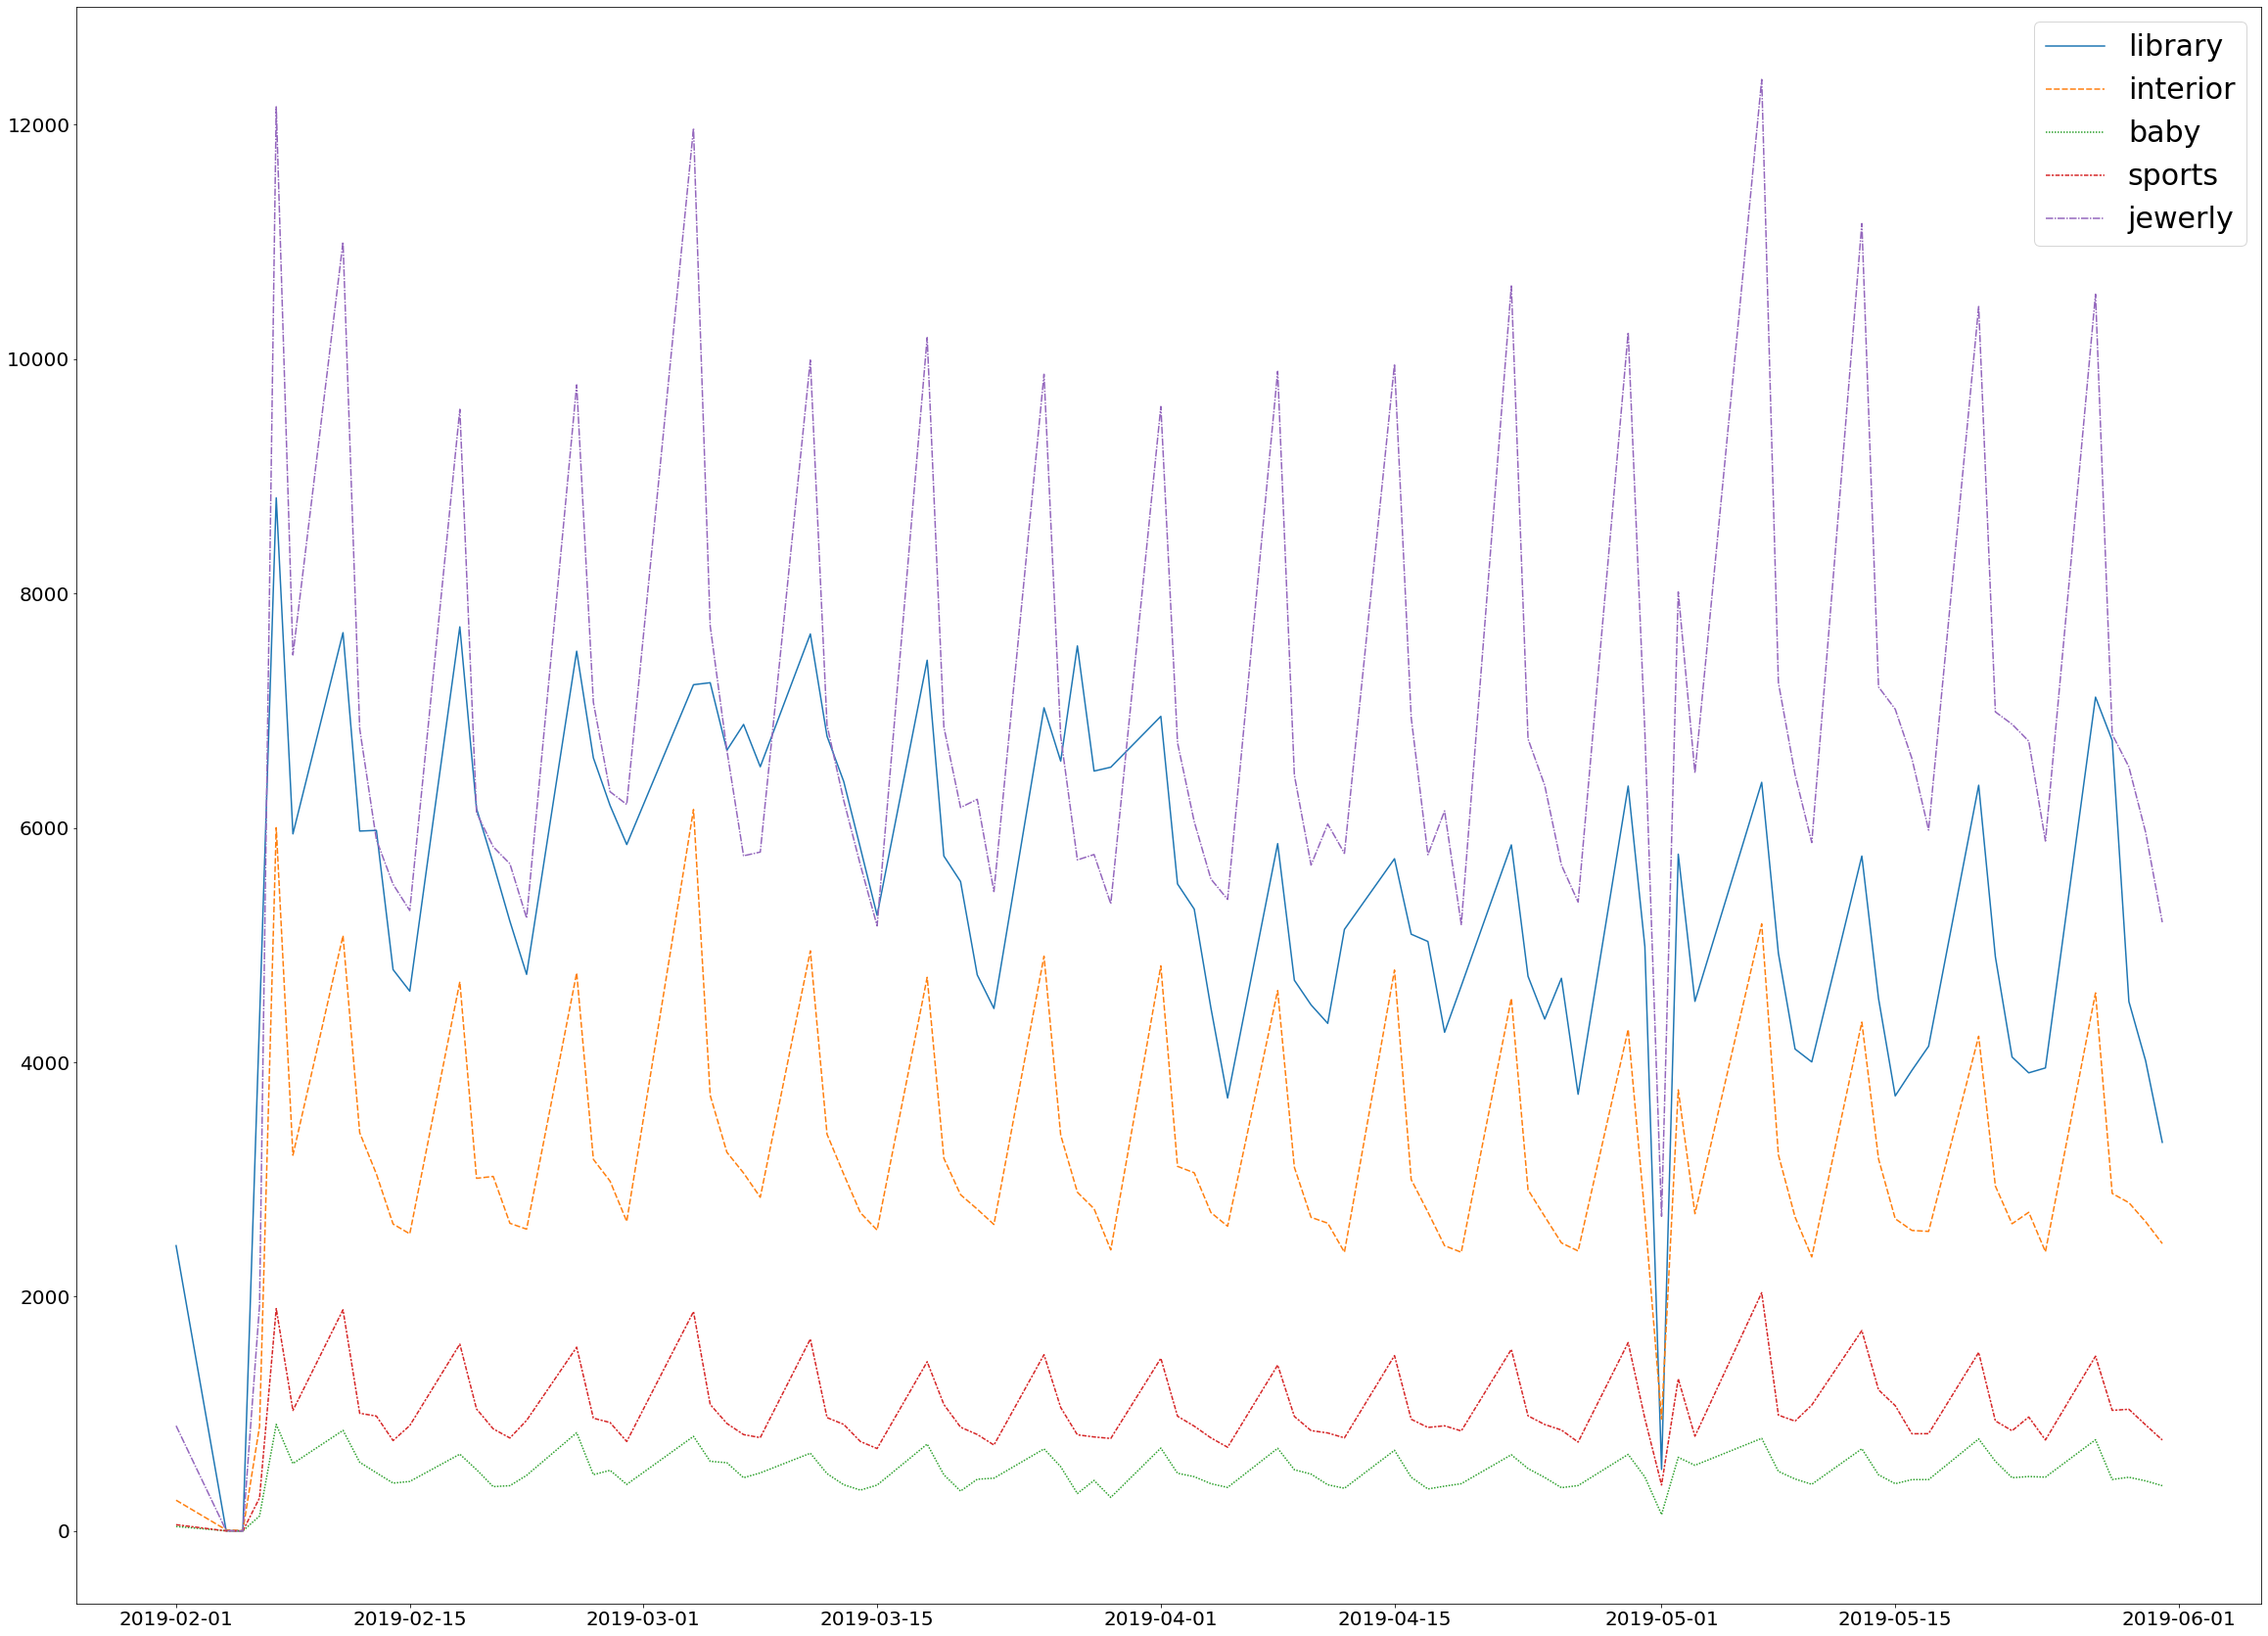

In [161]:
import seaborn as sns

# 2019년 도서/음반, 가구/인테리어, 출산/육아, 스포츠/레저, 패션잡화

plt.figure(figsize=(40, 30))

sns.lineplot(data = a.T)
plt.legend(('library', 'interior', 'baby', 'sports', 'jewerly'), fontsize=30)
plt.tick_params(labelsize=20)

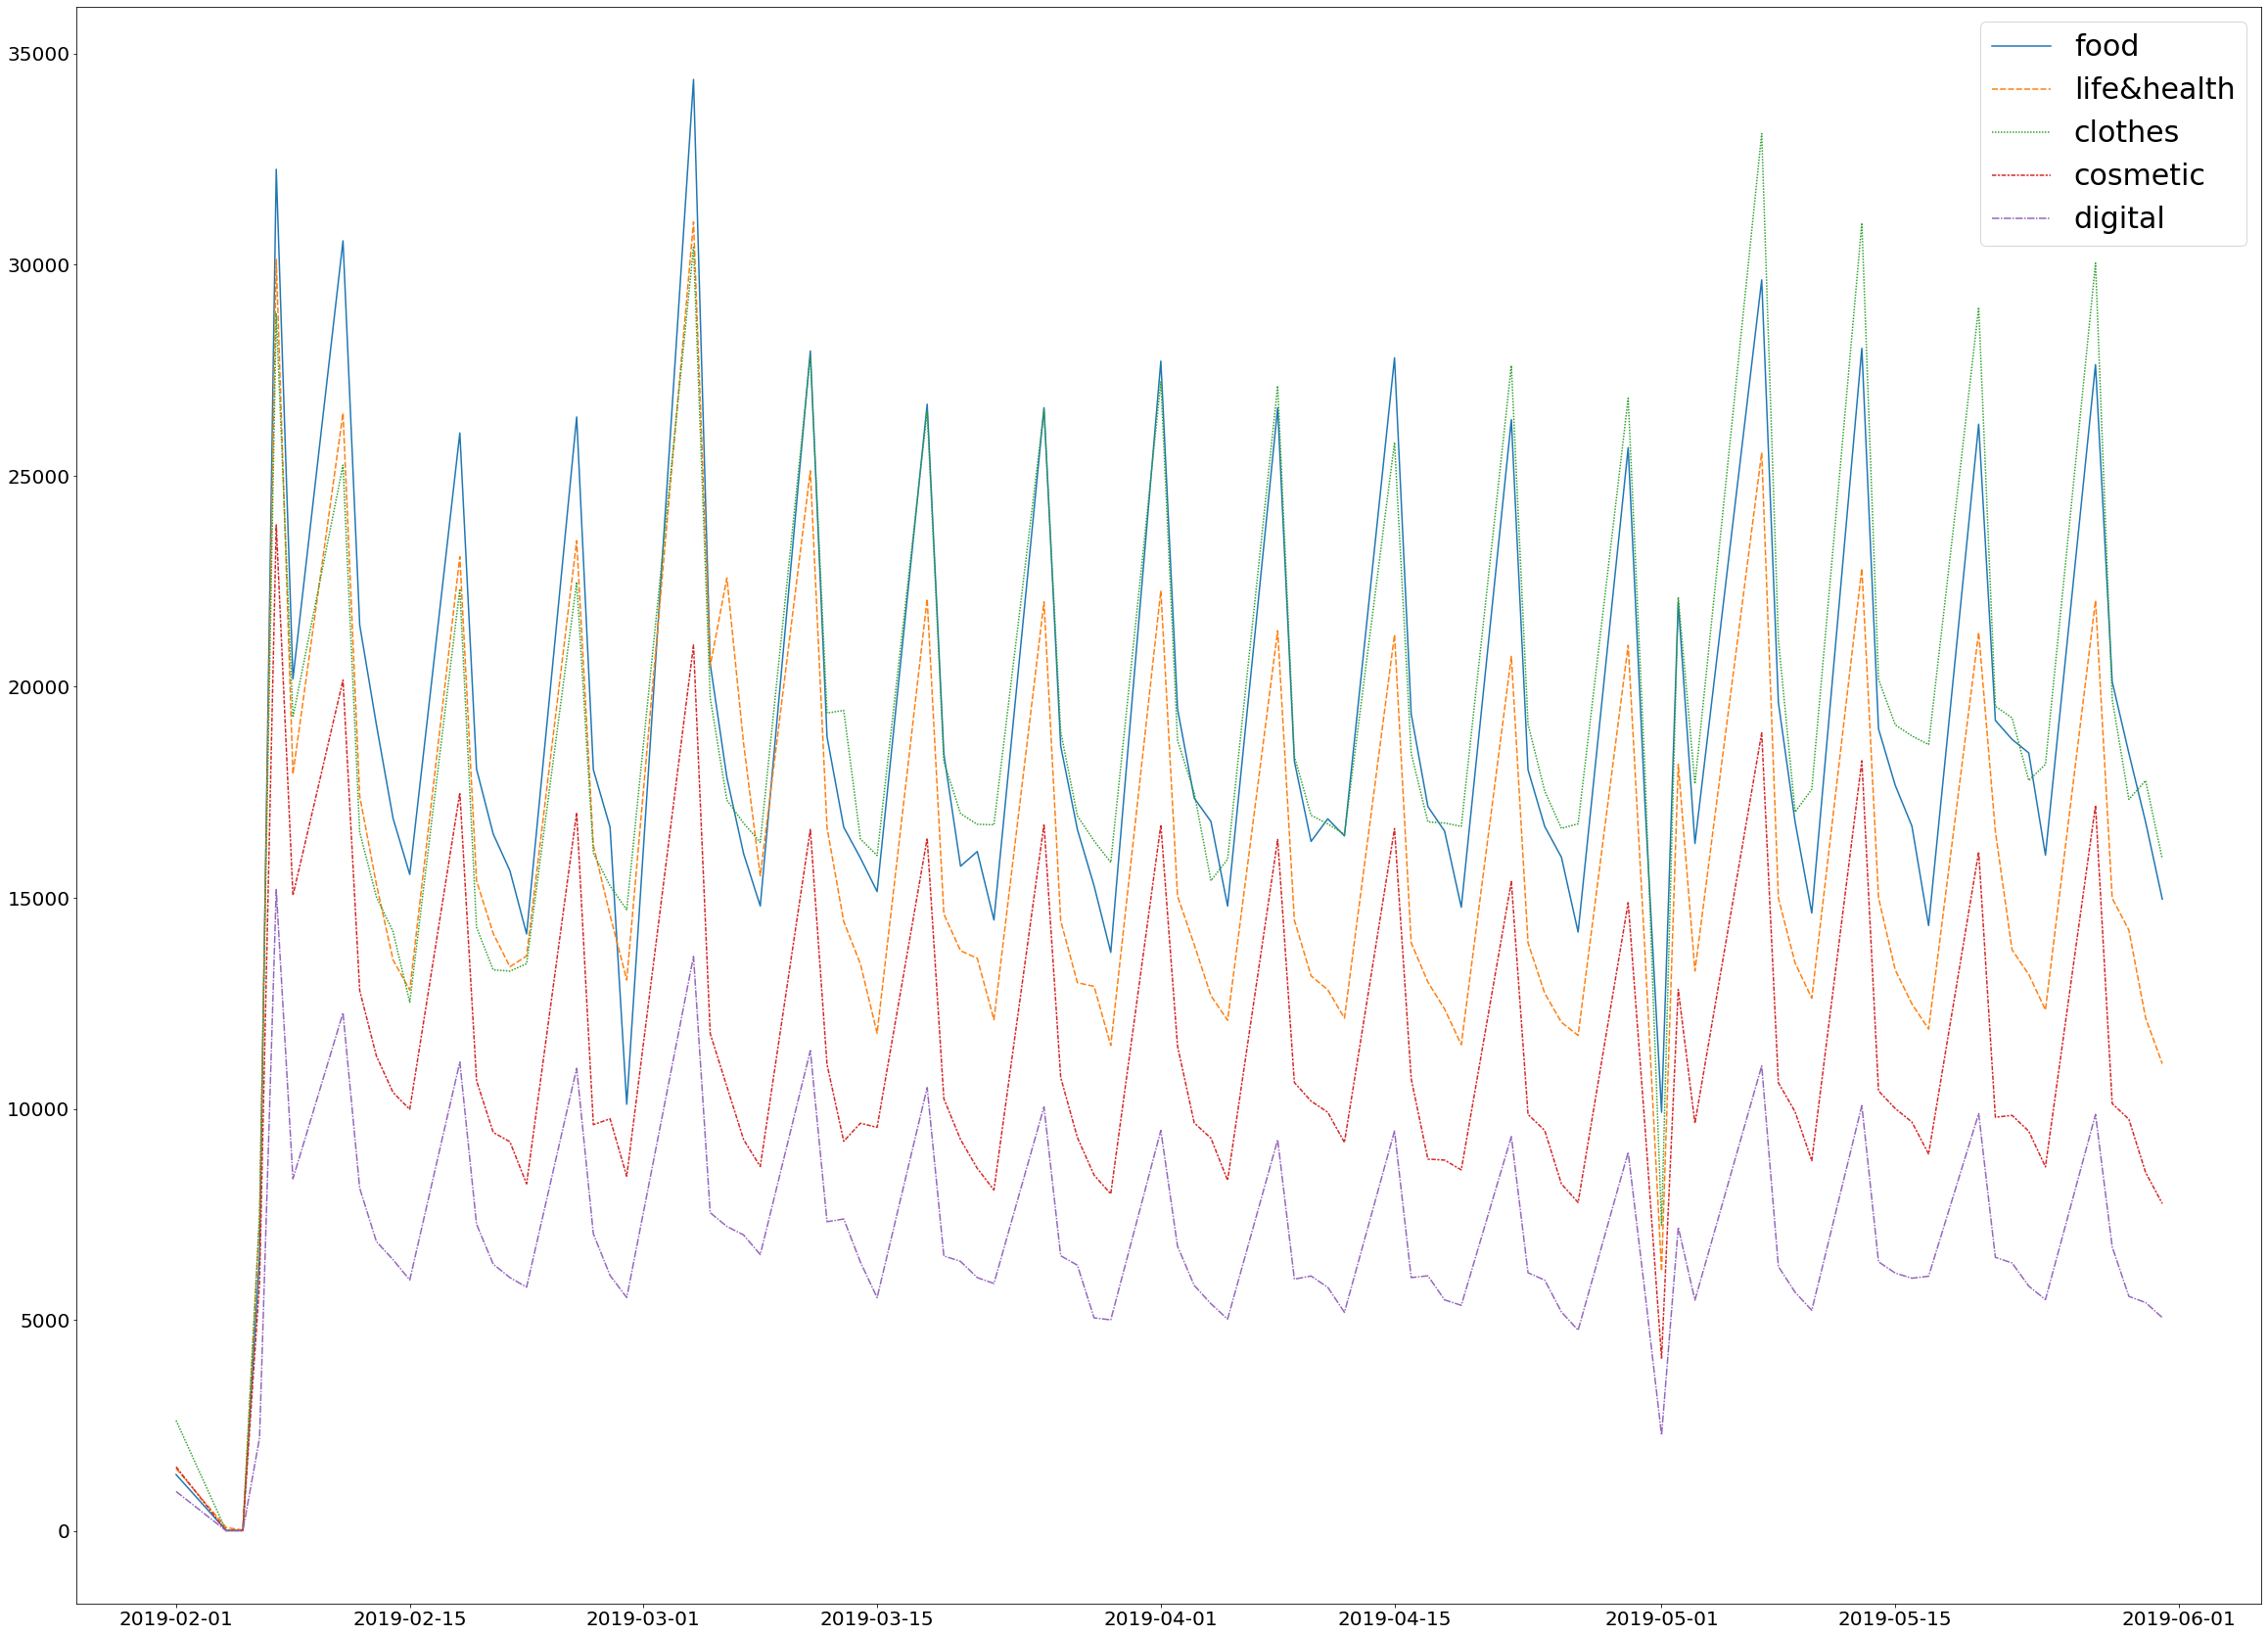

In [162]:
# 2019년 디지털/가전, 식품, 생활건강, 패션의류, 화장품/미용

plt.figure(figsize=(40, 30))

sns.lineplot(data = b.T)
plt.legend(('food', 'life&health', 'clothes', 'cosmetic', 'digital'), fontsize=30)
plt.tick_params(labelsize=20)

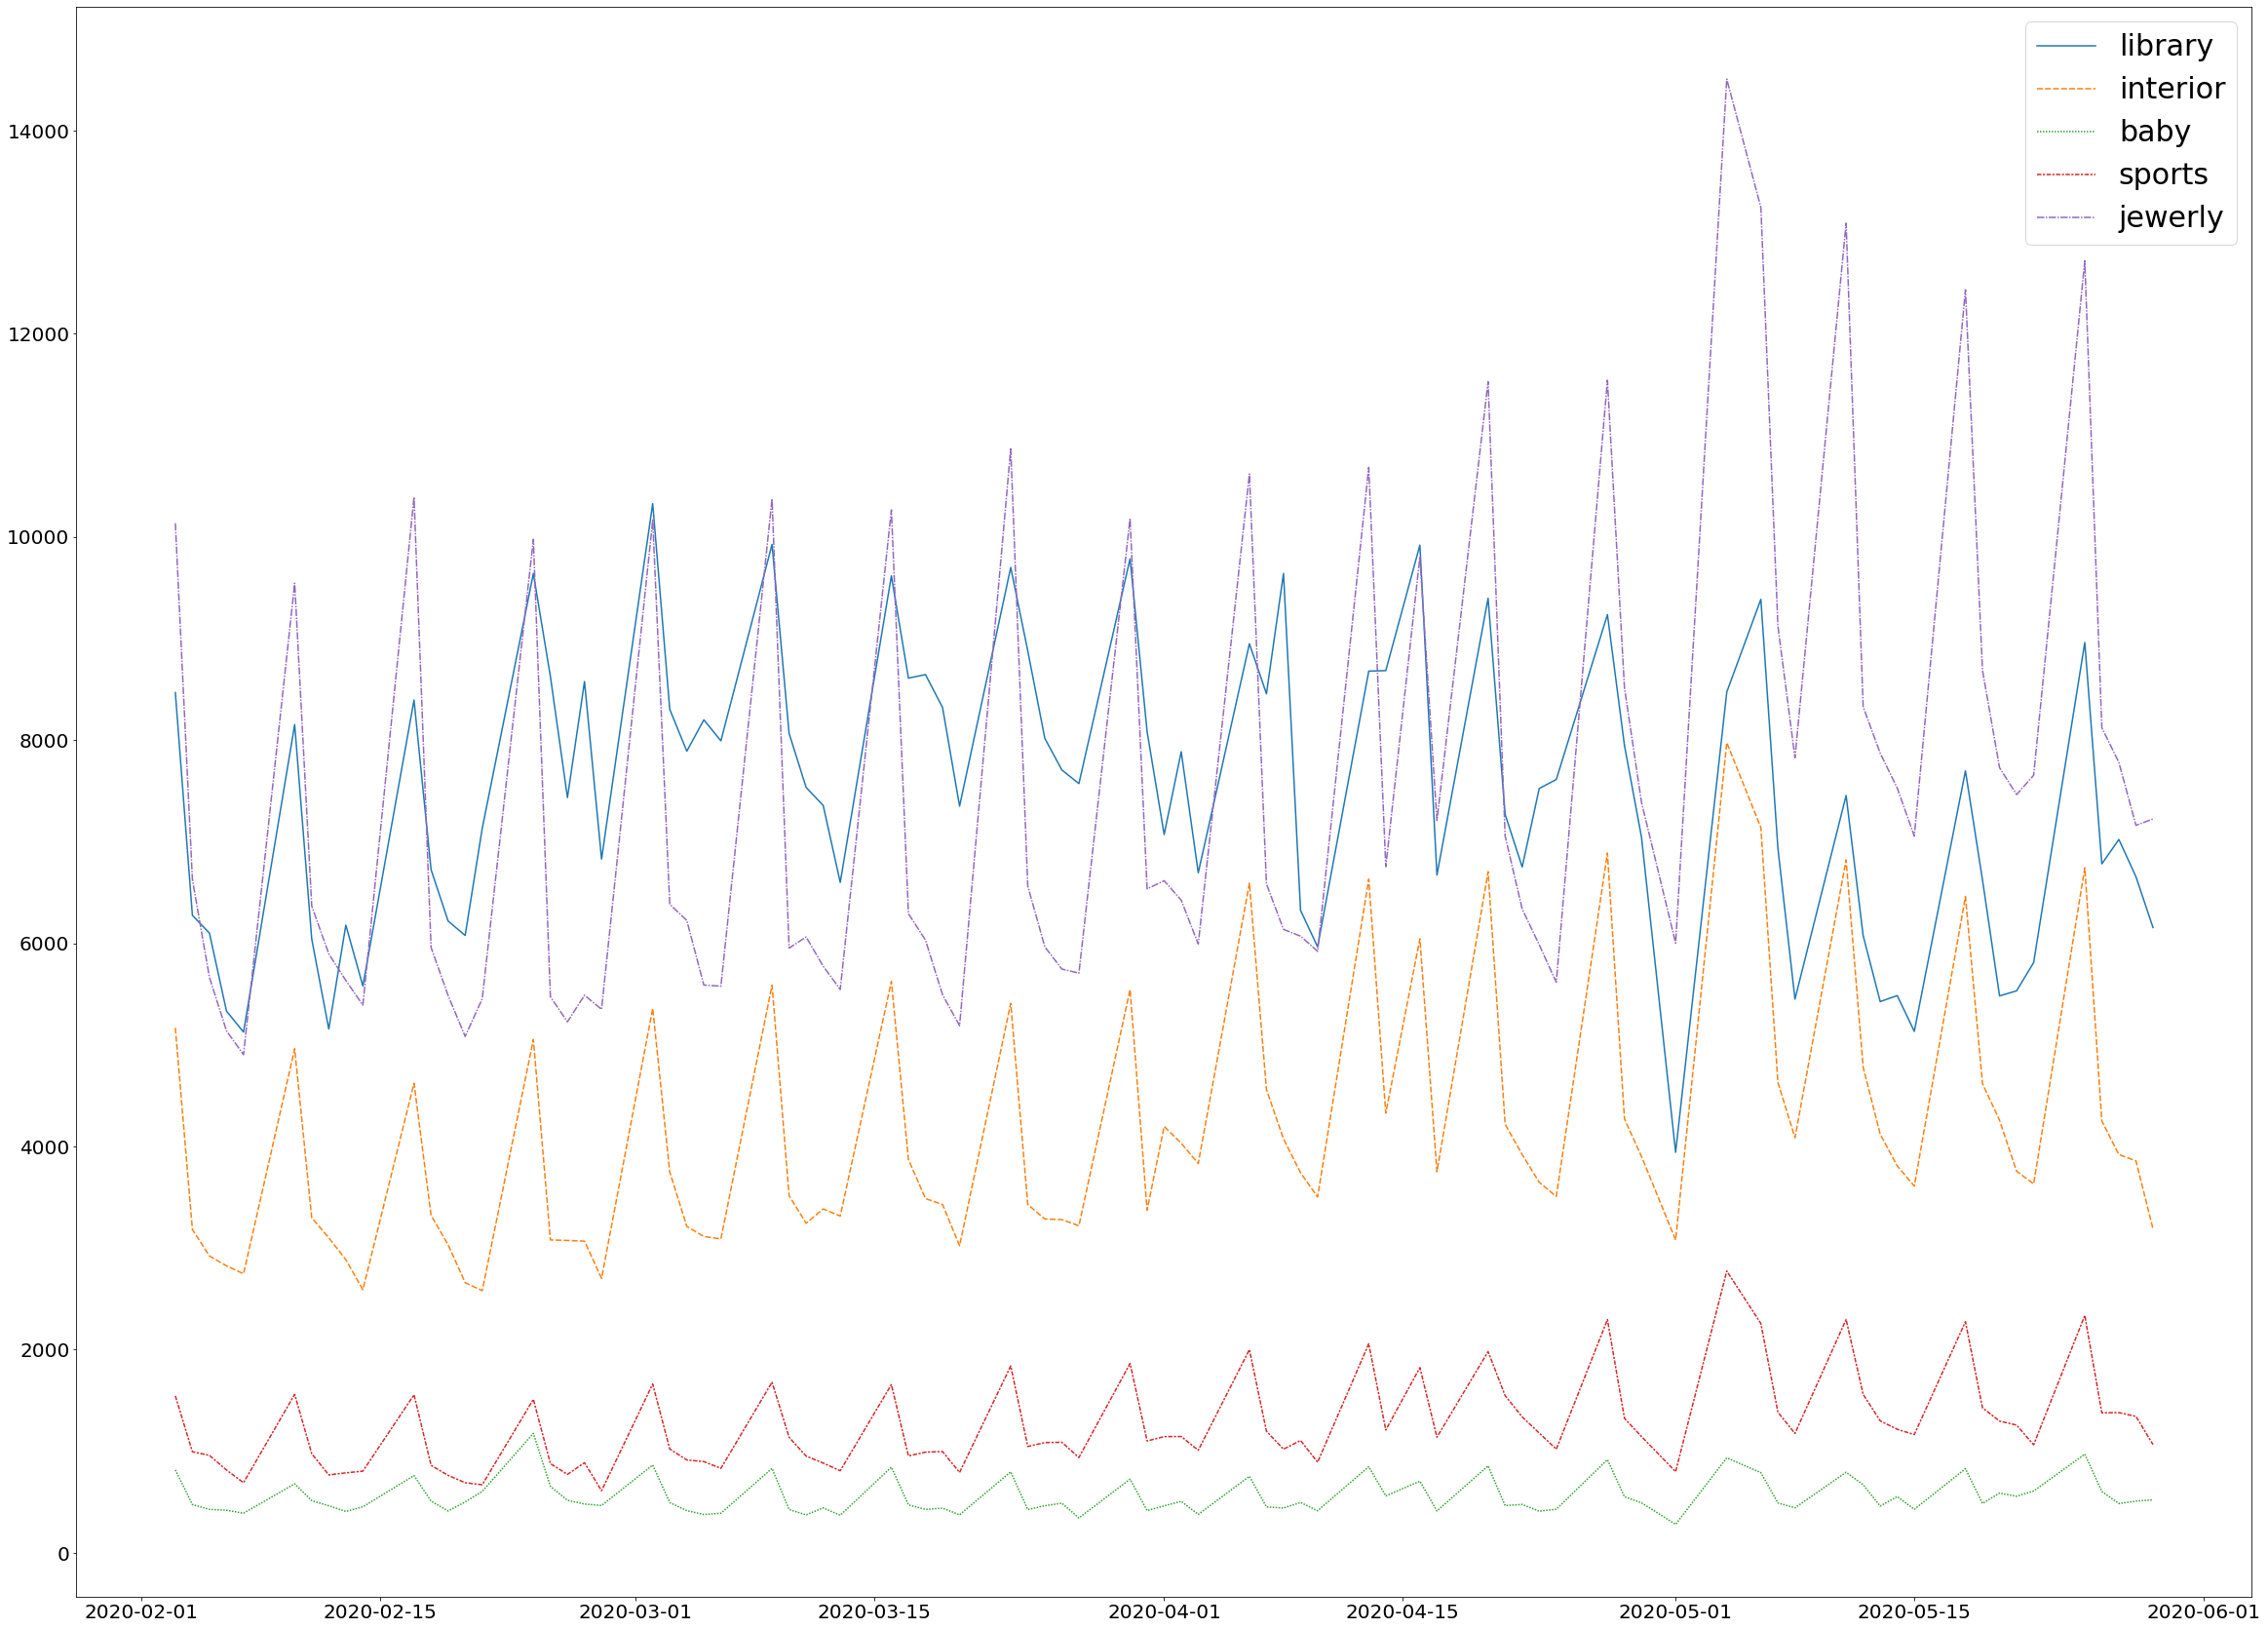

In [163]:
# 2020년 도서/음반, 가구/인테리어, 출산/육아, 스포츠/레저, 패션잡화

plt.figure(figsize=(40, 30))

sns.lineplot(data = c.T)
plt.legend(('library', 'interior', 'baby', 'sports', 'jewerly'), fontsize=30)
plt.tick_params(labelsize=20)

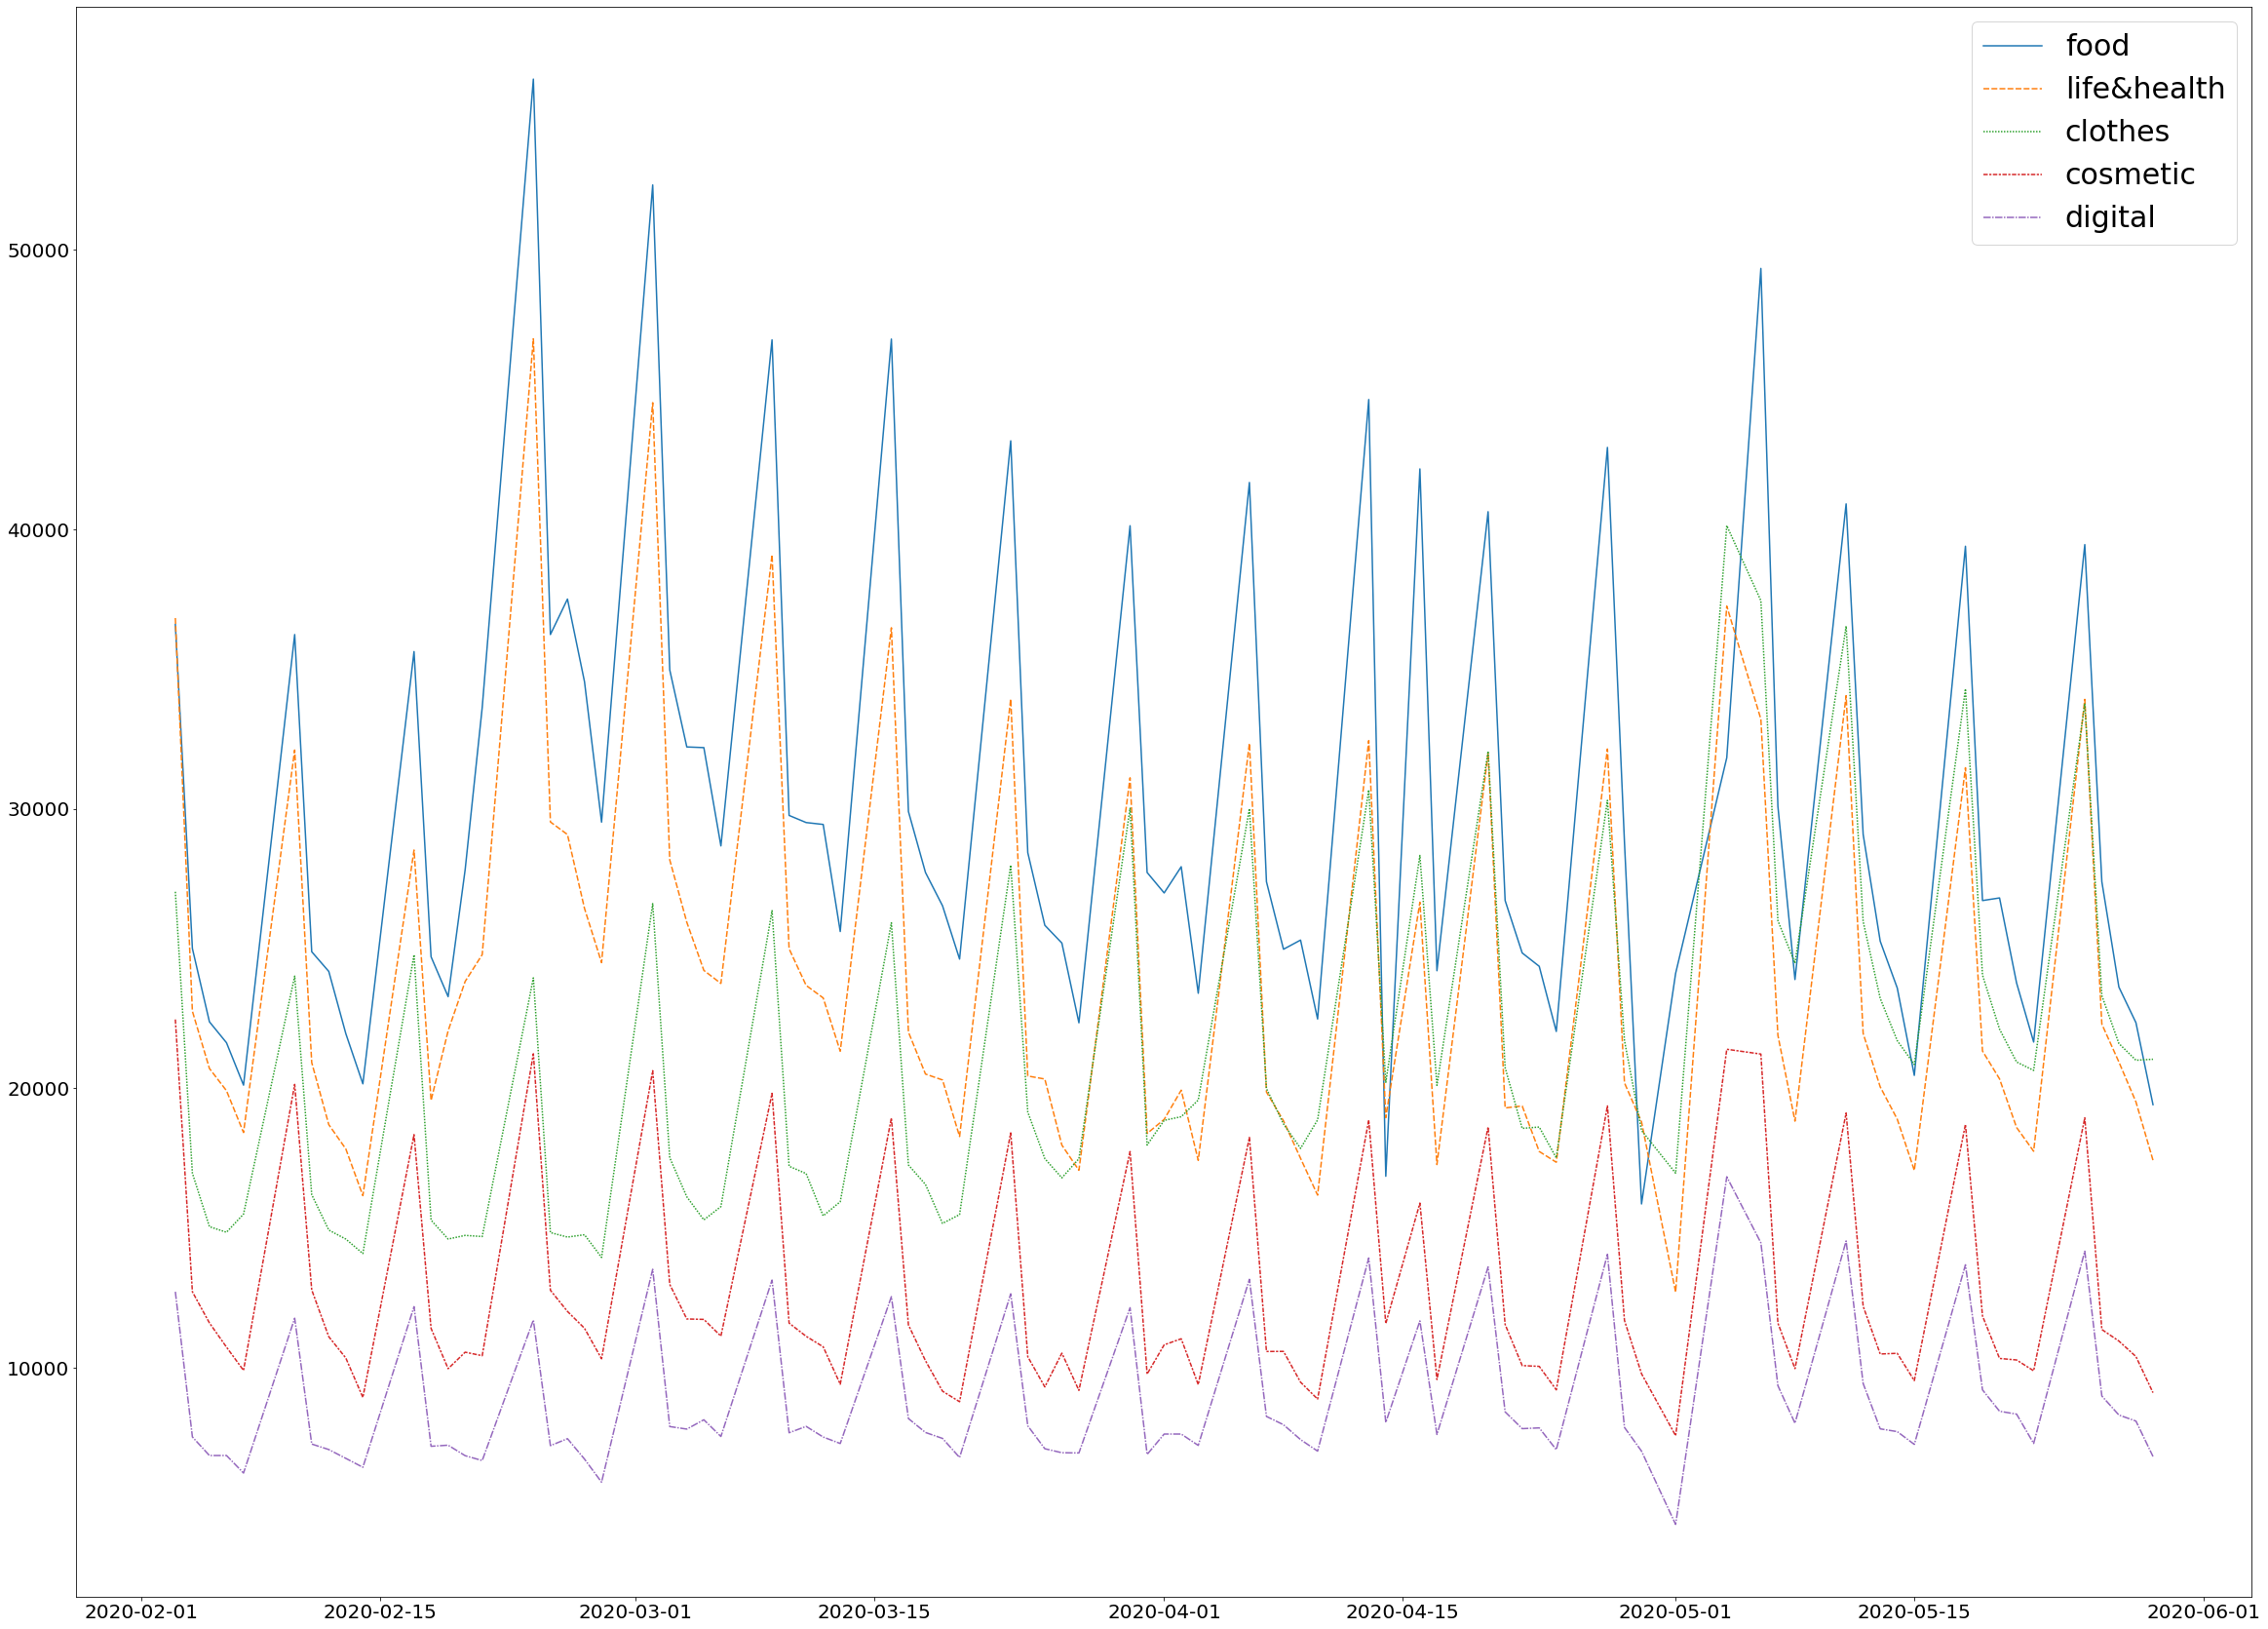

In [164]:
# 2020년 디지털/가전, 식품, 생활건강, 패션의류, 화장품/미용

plt.figure(figsize=(40, 30))

sns.lineplot(data = d.T)
plt.legend(('food', 'life&health', 'clothes', 'cosmetic', 'digital'), fontsize=30)
plt.tick_params(labelsize=20)